In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

df = pd.read_csv('Consumer_Reviews_Amazon.csv', index_col=0)
#change 'reviews.id' as object type
df['reviews.id'] = df['reviews.id'].astype('object')
#rename column
df.columns = [col.replace('.', '_') for col in df.columns]
#limiting the number of columns & rename
df = df[['name', 'primaryCategories', 'reviews_rating', 'reviews_text']]
df.columns = ['name', 'category', 'rating', 'text']


<Axes: title={'center': 'Rating Categories'}>

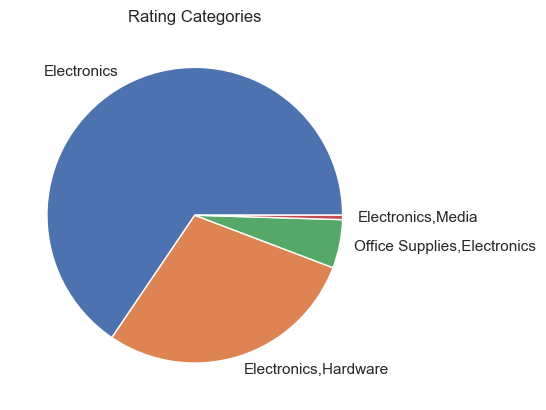

In [104]:
#plotting categories
df['category'].value_counts().plot(kind='pie', title='Rating Categories', ylabel='')


<Axes: title={'center': 'Rating Distribution'}, xlabel='rating'>

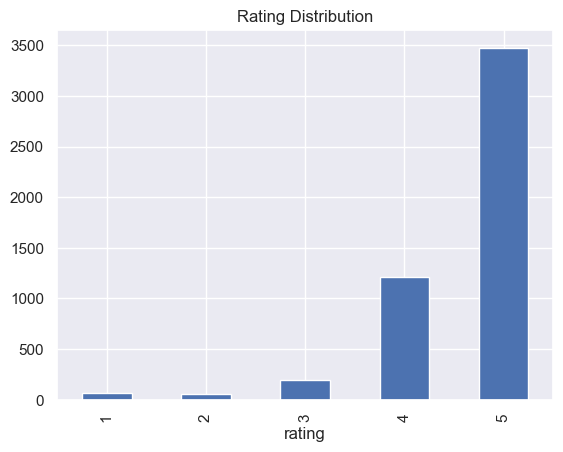

In [105]:
#plotting rating frequency
df['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution')


<Axes: title={'center': 'Top 3 Products by Rating Count'}>

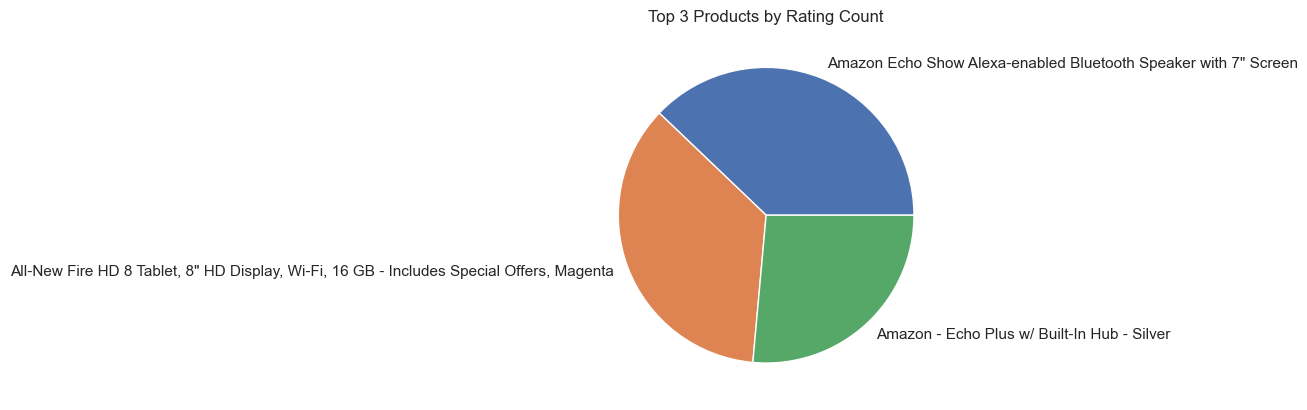

In [179]:
#exract top 3 most rating products
top3 = df.groupby('name').count()['rating'].nlargest(3)
top3.plot(kind='pie', title='Top 3 Products by Rating Count', ylabel='' )

In [197]:
#extract top 3 hgh rating products
top3 = df.groupby('name').agg({'rating': 'mean'}).nlargest(3, columns='rating')
print(top3)







                                                      rating
name                                                        
Amazon Fire TV with 4K Ultra HD and Alexa Voice...  5.000000
Amazon 9W PowerFast Official OEM USB Charger an...  4.863636
Kindle Oasis E-reader with Leather Charging Cov...  4.820513


In [196]:
#extract bottom 3 hgh rating products
top3 = df.groupby('name').agg({'rating': 'mean'}).nsmallest(3, columns='rating')
print(top3)

                                                      rating
name                                                        
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...  4.400000
Amazon Kindle E-Reader 6" Wifi (8th Generation,...  4.406250
Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes...  4.460916
